In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
sns.set_context('talk')

# Plot Style
plt.style.use(u'ggplot')

# Read in training Data File
# Fields are cuisine, id, ingredients
train = pd.read_json("../data/train.json")

# Find Cuisine Distribution
cuisine_distribution = Counter(train.cuisine)

# Plot Cuisine Distribution
cuisine_fig = pd.DataFrame(cuisine_distribution, index=[0]).transpose()[0].plot(kind='barh')
cuisine_fig.invert_yaxis()
cuisine_fig = cuisine_fig.get_figure()
cuisine_fig.tight_layout()
cuisine_fig.savefig("Cuisine_Distribution.jpg")

# Find Ingredient Distribution
recipe_ingredient = [Counter(recipe) for recipe in train.ingredients]
ingredient_distribution = sum(recipe_ingredient, Counter())

# Plot Ingredient Distribution
ingredient_fig = pd.DataFrame(ingredient_distribution, index=[0]).transpose()[0].plot(kind='barh')
ingredient_fig.invert_yaxis()
ingredient_fig = ingredient_fig.get_figure()
ingredient_fig.tight_layout()
ingredient_fig.savefig("Ingredient_Distribution.jpg")





In [15]:
#Least Common Ingredients

ingredients_individual = Counter([ingredient for ingredient_list in train.ingredients for ingredient in ingredient_list])
ingredients_individual = pd.DataFrame.from_dict(ingredients_individual,orient='index').reset_index()
ingredients_individual = ingredients_individual.rename(columns={'index':'Ingredient', 0:'Count'})
ingredients_individual.sort_values('Count', ascending = False)['Count'].describe()
ingredients_individual.sort_values('Count', ascending=True).head(20)


,Ingredient,Count
6713,crushed cheese crackers,1
5194,mora chiles,1
5195,double smoked bacon,1
5198,Mazola Canola Oil,1
5201,seasoned croutons,1
1757,turkey hot dogs,1
5202,avocado dressing,1
5203,light kidney beans,1
5205,white bread slices,1
1747,fiber one,1


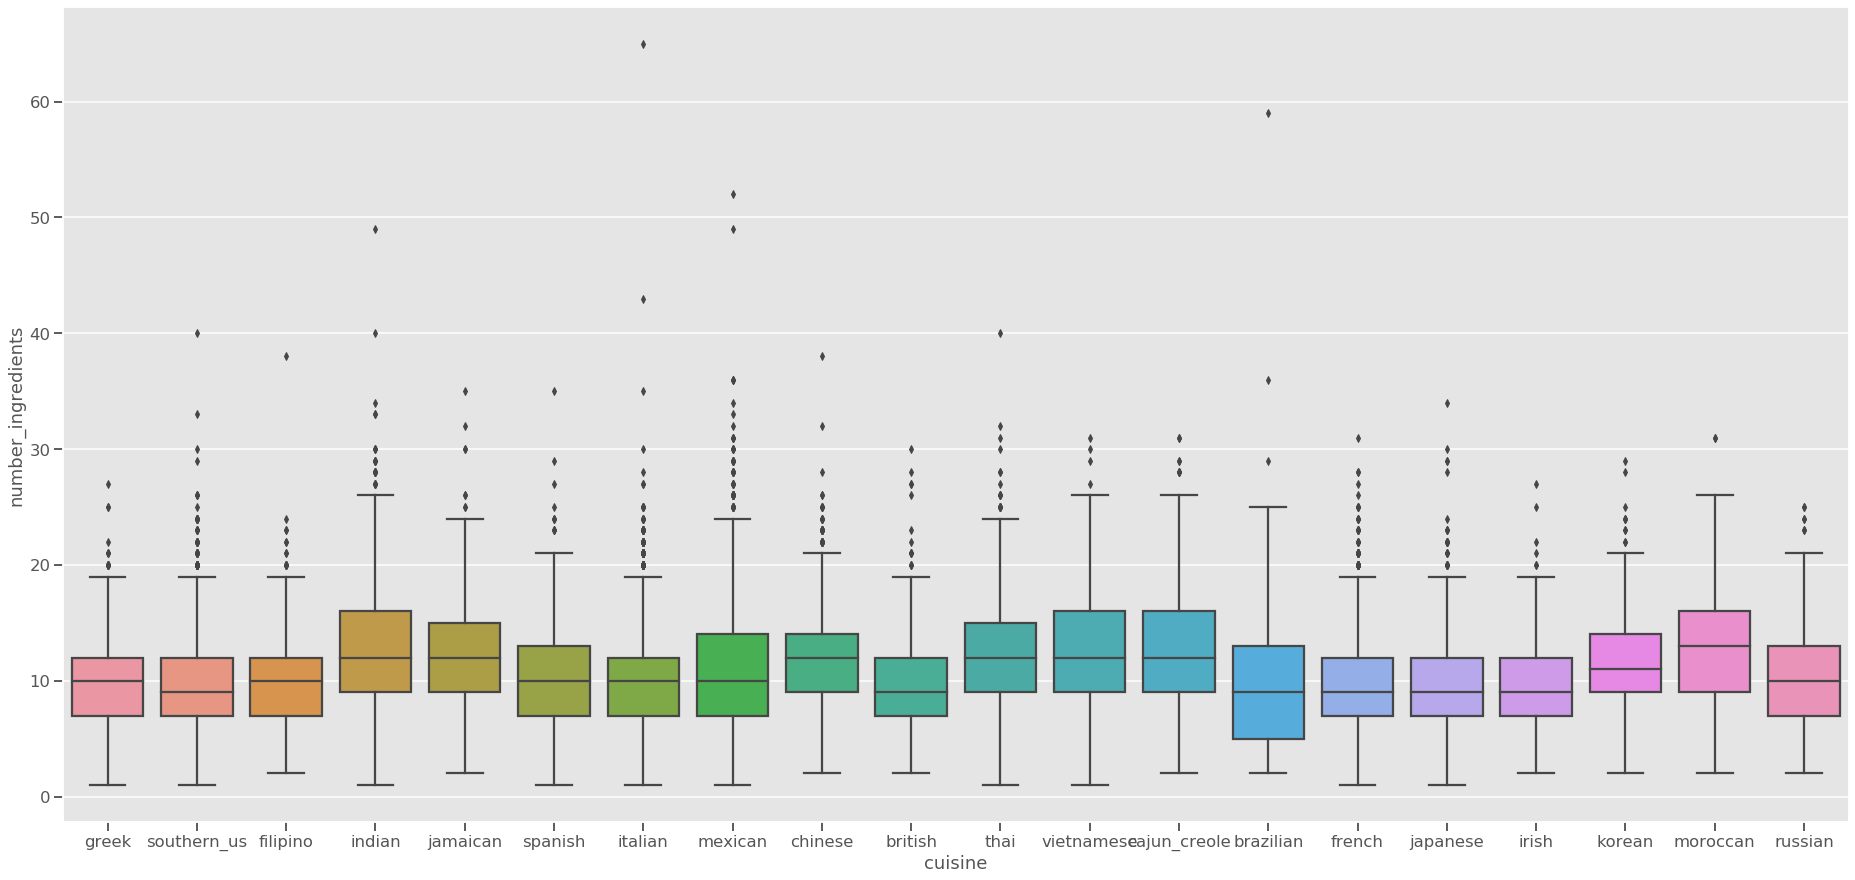

In [19]:
#Plot Ingredient Count
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
sns.set_context('talk')

f, ax = plt.subplots(figsize=(32,15))
sns.boxplot(x='cuisine',
            y='number_ingredients',
            data= (pd.concat([train.cuisine,train.ingredients.map(lambda l: len(l))], axis=1)
                    .rename(columns={'ingredients':'number_ingredients'}))
            )



In [26]:
import os
os.listdir()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.set_printoptions(threshold=np.inf)
rcParams['figure.figsize'] = (15,15)
df = pd.read_json("C:/Users/chloe/Desktop/3B/MSCI436Project/train.json", orient='records')

#print number of records
print("number of records {0}".format(len(df.id)))

# printing cuisine types and counts
print(df.cuisine.value_counts(normalize=True))
print("Number of cuisine types {0}".format(len(df.cuisine.value_counts())))
print("number of unique ingredients {0}".format(len(set([ingredient for ingredient_list in df.ingredients.values for ingredient in ingredient_list]))))

number of records 39774
italian         0.197063
mexican         0.161865
southern_us     0.108614
indian          0.075502
chinese         0.067205
french          0.066526
cajun_creole    0.038870
thai            0.038694
japanese        0.035777
greek           0.029542
spanish         0.024865
korean          0.020868
vietnamese      0.020742
moroccan        0.020642
british         0.020214
filipino        0.018982
irish           0.016770
jamaican        0.013225
russian         0.012294
brazilian       0.011741
Name: cuisine, dtype: float64
Number of cuisine types 20
number of unique ingredients 6714
